#### 7PAM2002-0901-2024 - MSc Data Science Project

Topic - Comparing Data Augmentation Methods – Easy Data Augmentation and Back Translation for text(Intentation) Classification using LSTM.

Research Question - Which data augmentation methods applied on a small dataset outperform models trained without augmentation in terms of accuracy and precision in case of intention(text) classification using LSTM as training models, and by how much do they improve performance?

Supervisor - Dr. Man Lai Tang

Done by - Mohit Agarwal (22031257)

### Importing Packages

In [16]:
# importing required packages...
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [2]:
# appending the location for augment modules
import sys
sys.path.append(r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Agument")
# appending the location for modles modules
sys.path.append(r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Models")

In [3]:
# importing modules from local drives...
import preprocess_eda as preprocess
import lstm
import train_lstm
import back_translation
import eda

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# setiing plot style
plt.style.use("seaborn-v0_8-darkgrid")

#### Defining Paths

In [5]:
# path for augment plot
augment_plot_path = r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Augment"
# path for augment data
augment_data_path = r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Agument\Augment_Data\Training_Validation_Testing"
# model callback path for saving models and log files
model_callback_path = r"D:\MScDataScience\7.Data_Science_Project\Model_Callbacks\Augment"

### Reading Augmented Data

In [6]:
# combining the training, validation, testin data for augmentation
whole_data = pd.concat([preprocess.train_df,
                        preprocess.val_df,
                        preprocess.test_df], ignore_index=True)

##### EDA Data Augmented from Whole Data

In [7]:
# reading size 1 data
eda_size_1_train, eda_size_1_val, eda_size_1_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"EDA\eda_augmented_data_size_1.csv"), data=whole_data)
# reading size 2 data
eda_size_2_train, eda_size_2_val, eda_size_2_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"EDA\eda_augmented_data_size_2.csv"), data=whole_data)
# reading size 3 data
eda_size_3_train, eda_size_3_val, eda_size_3_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"EDA\eda_augmented_data_size_3.csv"), data=whole_data)
# reading size 4 data
eda_size_4_train, eda_size_4_val, eda_size_4_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"EDA\eda_augmented_data_size_4.csv"), data=whole_data)
# reading size 5 data
eda_size_5_train, eda_size_5_val, eda_size_5_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"EDA\eda_augmented_data_size_5.csv"), data=whole_data)
# reading size 10 data
eda_size_10_train, eda_size_10_val, eda_size_10_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"EDA\eda_augmented_data_size_10.csv"), data=whole_data)

### Exploratory Data Analysis For EDA Augmented Data

#### For Size-1

The length of the training data:  15000
The length of the testing data:  9000
The length of the validation data:  6000


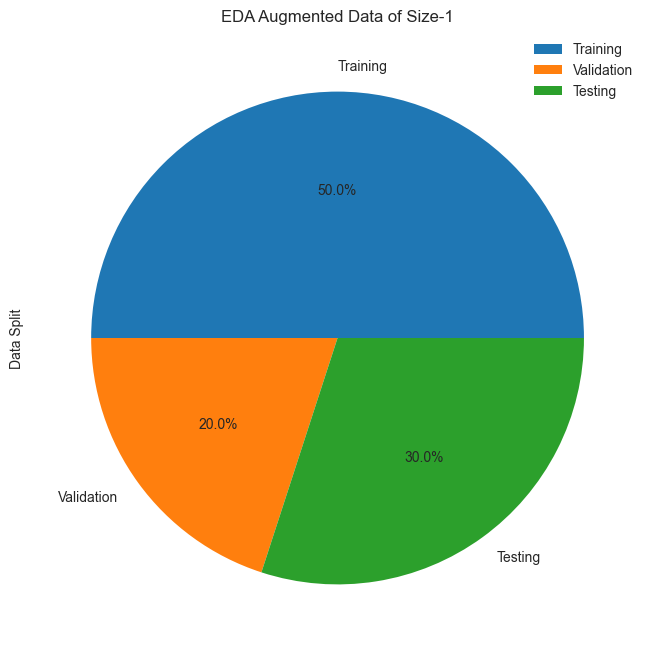

In [8]:
preprocess.records_per_set(train=eda_size_1_train,
                           val=eda_size_1_val,
                           test=eda_size_1_test,
                           title="EDA Augmented Data of Size-1")

##### Training Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  1
[INFO] Maximum Number of Charaters in a query is:  145


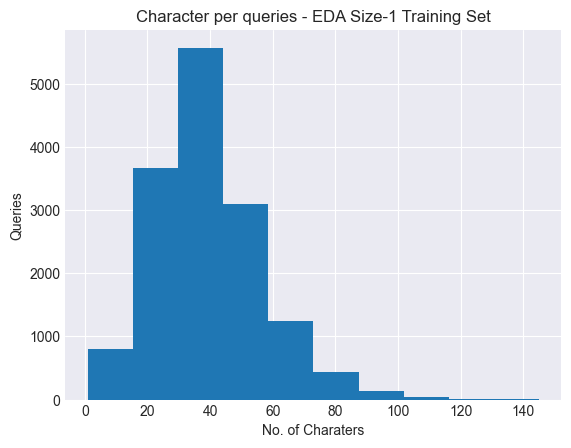

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  27


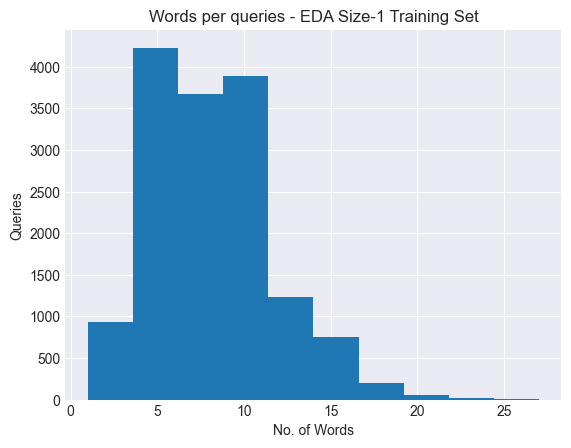

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  11.0


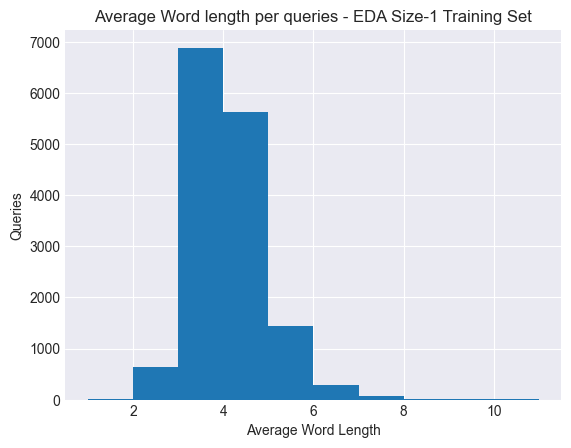


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  6254


In [9]:
# exploring the training data
train_explore = preprocess.eda(data=eda_size_1_train,
                               path=os.path.join(augment_plot_path, r"EDA\Before_Preprocessing\Training"))
# plotting number of character per record
train_explore.char_per_query(title="EDA Size-1 Training Set")
# plotting number of words per record
train_explore.word_per_query(title="EDA Size-1 Training Set")
# plotting average word length per record
train_explore.avg_word_len_per_query(title="EDA Size-1 Training Set")
# line graph of word frequency per class
train_word_freq_dict = train_explore.word_freq_per_class(title="EDA Size-1 Training Set")
# worldcloud of word frequency per class
train_worldcloud_dict = train_explore.word_cloud_per_class(
    title="EDA Size-1 Training Set")
# number of unique words
train_num_unique_words = train_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", train_num_unique_words)

The length of the queries is the tarining set is not long. Most queries has in 4 to 11 words, highest beign 25.

##### Validation Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  2
[INFO] Maximum Number of Charaters in a query is:  147


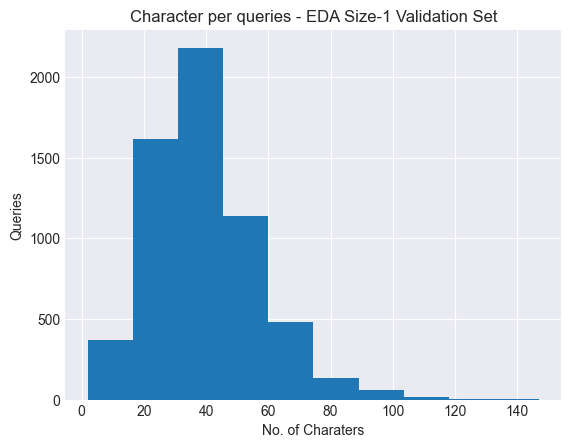

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  30


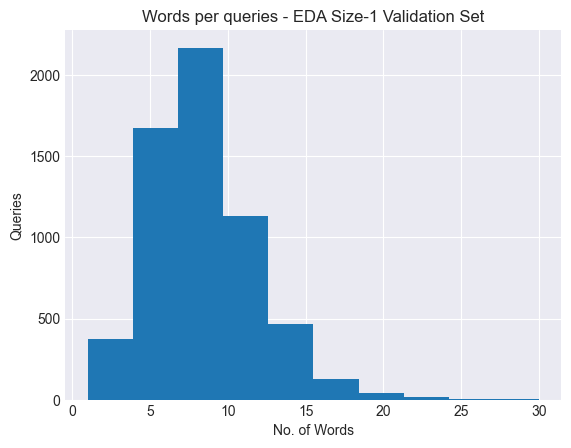

[INFO] Minimum Number of Average Words Length in a query is:  1.5
[INFO] Maximum Number of Average Words Length in a query is:  10.0


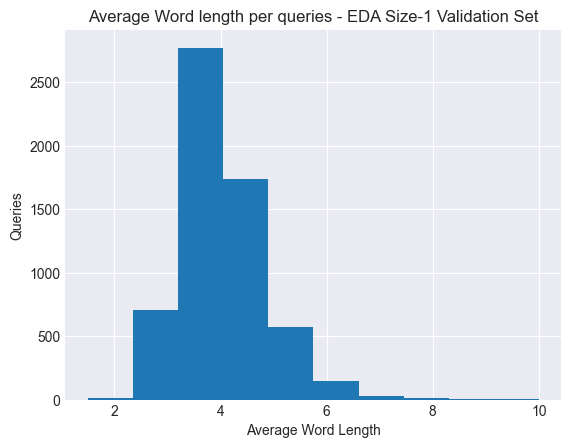


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  4101


In [10]:
# exploring the validation data
val_explore = preprocess.eda(data=eda_size_1_val,
                             path=os.path.join(augment_plot_path, r"EDA\Before_Preprocessing\Validation"))
# plotting number of character per record
val_explore.char_per_query(title="EDA Size-1 Validation Set")
# plotting number of words per record
val_explore.word_per_query(title="EDA Size-1 Validation Set")
# plotting average word length per record
val_explore.avg_word_len_per_query(title="EDA Size-1 Validation Set")
# line graph of word frequency per class
val_word_freq_dict = val_explore.word_freq_per_class(title="EDA Size-1 Validation Set")
# worldcloud of word frequency per class
val_worldcloud_dict = val_explore.word_cloud_per_class(
    title="EDA Size-1 Validation Set")
# number of unique words
val_num_unique_words = val_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", val_num_unique_words)

The average word

##### Testing Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  2
[INFO] Maximum Number of Charaters in a query is:  181


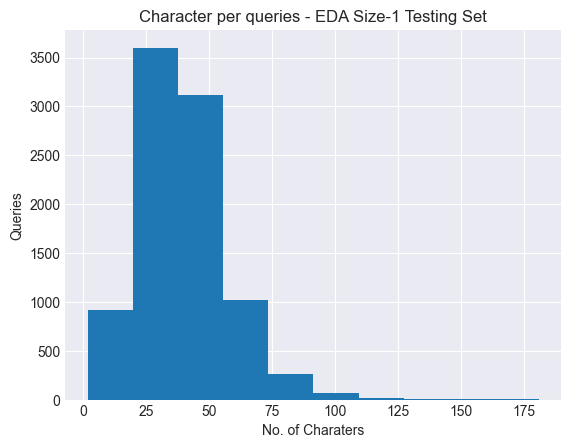

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  33


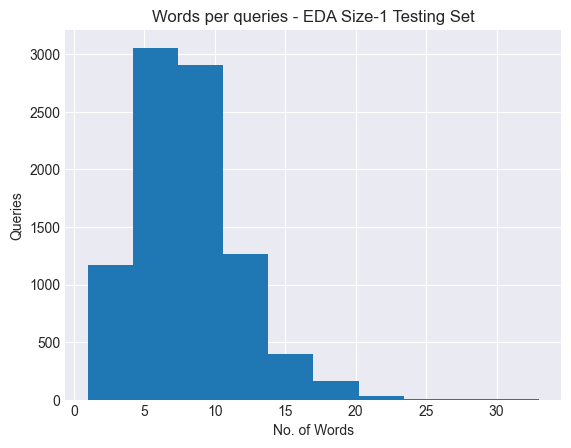

[INFO] Minimum Number of Average Words Length in a query is:  1.5
[INFO] Maximum Number of Average Words Length in a query is:  11.0


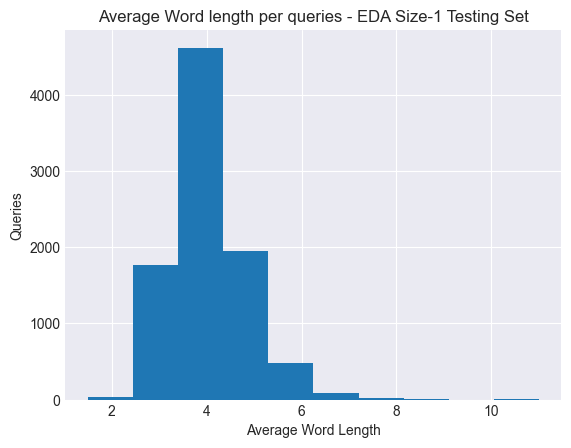


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  5018


In [11]:
# exploring the testing data
test_explore = preprocess.eda(data=eda_size_1_test,
                              path=os.path.join(augment_plot_path, r"EDA\Before_Preprocessing\Testing"))
# plotting number of character per record
test_explore.char_per_query(title="EDA Size-1 Testing Set")
# plotting number of words per record
test_explore.word_per_query(title="EDA Size-1 Testing Set")
# plotting average word length per record
test_explore.avg_word_len_per_query(title="EDA Size-1 Testing Set")
# line graph of word frequency per class
test_word_freq_dict = test_explore.word_freq_per_class(title="EDA Size-1 Testing Set")
# worldcloud of word frequency per class
test_worldcloud_dict = test_explore.word_cloud_per_class(title="EDA Size-1 Testing Set")
# number of unique words
test_num_unique_words = test_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", test_num_unique_words)

### Preprocessing the EDA Augmented Data

#### For Size-1

In [8]:
# preprocessing the training set
train_preprocess = preprocess.pre_process(eda_size_1_train)
x_train = train_preprocess.preprocess()
# lemmentizing the preprocessed data
x_train = train_preprocess.lemmatise()

# encoding the classes to one-hot format
y_train = train_preprocess.encode_class()

In [9]:
# preprocessing the validation set
val_preprocess = preprocess.pre_process(eda_size_1_val)
x_val = val_preprocess.preprocess()
# lemmentizing the preprocessed data
x_val = val_preprocess.lemmatise()

# encoding the classes to one-hot format
y_val = val_preprocess.encode_class()

In [10]:
# preprocessing the testing set
test_preprocess = preprocess.pre_process(eda_size_1_test)
x_test = test_preprocess.preprocess()
# lemmentizing the preprocessed data
x_test = test_preprocess.lemmatise()

# encoding the classes to one-hot format
y_test = test_preprocess.encode_class()

### Exploring the Processed EDA Augmented Datasets

#### For Size-1

##### Training Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  105


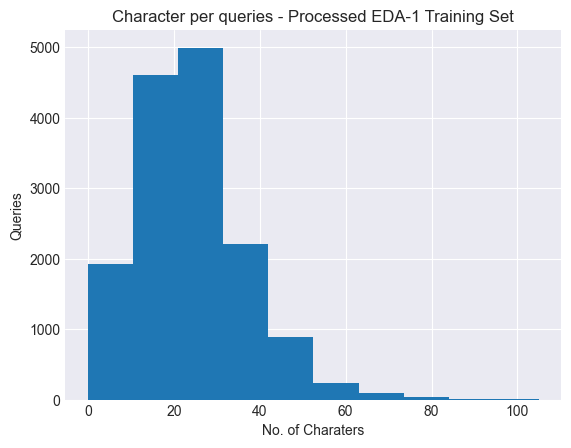

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  16


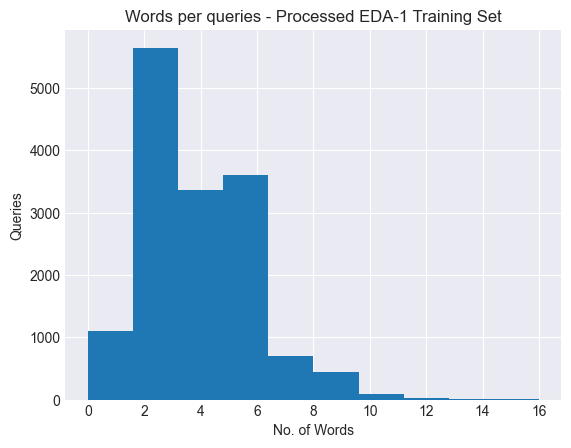

c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  13.0


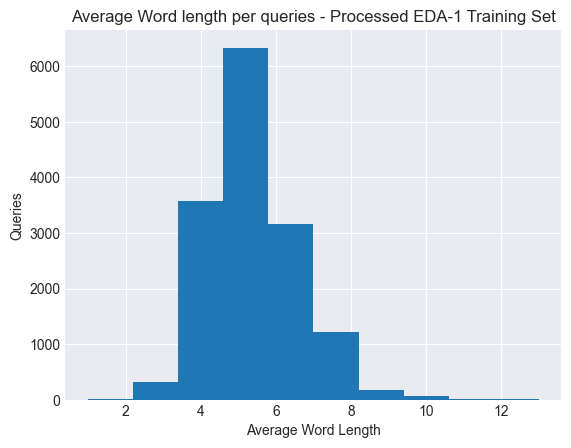


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  4954


In [15]:
# creating processed training dataframe
processed_train_df = pd.DataFrame(({"Query": x_train,
                                    "Intent": eda_size_1_train.iloc[:, 1]}))
# exploring the processed training data
processed_train_explore = preprocess.eda(data=processed_train_df,
                                         path=os.path.join(augment_plot_path, r"EDA\Preprocessed\Training"))
# plotting number of character per record
processed_train_explore.char_per_query(title="Processed EDA-1 Training Set")
# plotting number of words per record
processed_train_explore.word_per_query(title="Processed EDA-1 Training Set")
# plotting average word length per record
processed_train_explore.avg_word_len_per_query(title="Processed EDA-1 Training Set")
# line graph of word frequency per class
processed_train_word_freq_dict = processed_train_explore.word_freq_per_class(
    title="Processed EDA-1 Training Set")
# worldcloud of word frequency per class
processed_train_worldcloud_dict = processed_train_explore.word_cloud_per_class(
    title="Processed EDA-1 Training Set")
# number of unique words
processed_train_num_unique_words = processed_train_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_train_num_unique_words)

##### Validation Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  103


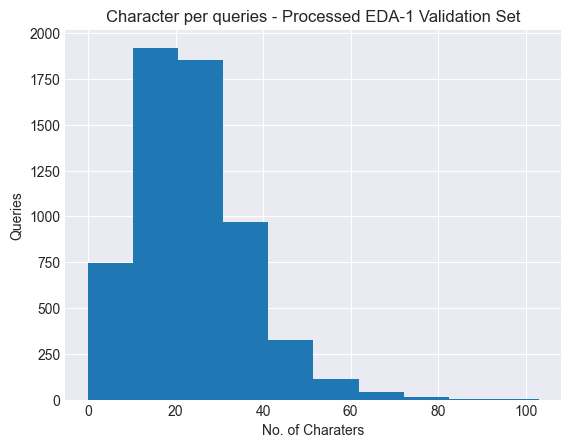

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  16


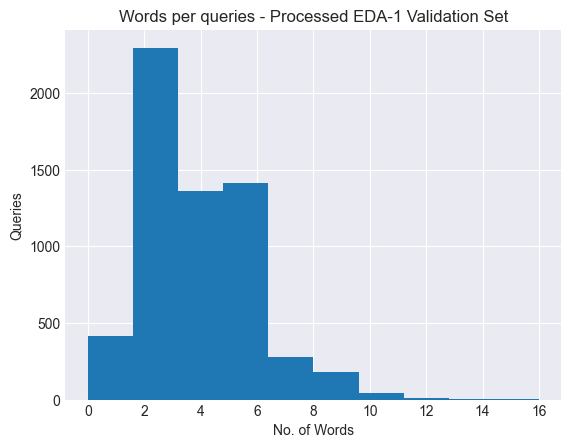

c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  13.0


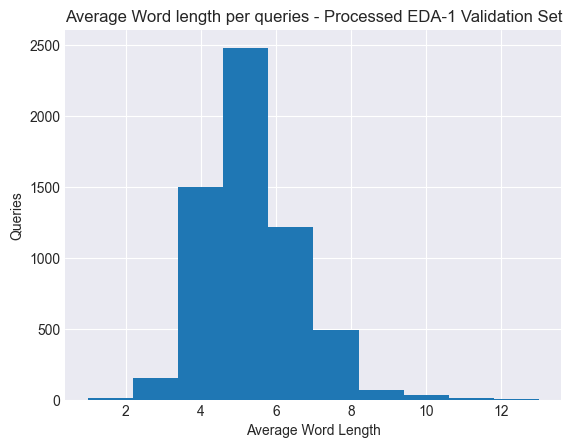


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  3272


In [16]:
# creating processed validation dataframe
processed_val_df = pd.DataFrame(({"Query": x_val,
                                  "Intent": eda_size_1_val.iloc[:, 1]}))
# exploring the processed validation data
processed_val_explore = preprocess.eda(data=processed_val_df,
                                       path=os.path.join(augment_plot_path, r"EDA\Preprocessed\Validation"))
# plotting number of character per record
processed_val_explore.char_per_query(title="Processed EDA-1 Validation Set")
# plotting number of words per record
processed_val_explore.word_per_query(title="Processed EDA-1 Validation Set")
# plotting average word length per record
processed_val_explore.avg_word_len_per_query(
    title="Processed EDA-1 Validation Set")
# line graph of word frequency per class
processed_val_word_freq_dict = processed_val_explore.word_freq_per_class(
    title="Processed EDA-1 Validation Set")
# worldcloud of word frequency per class
processed_val_worldcloud_dict = processed_val_explore.word_cloud_per_class(
    title="Processed EDA-1 Validation Set")
# number of unique words
processed_val_num_unique_words = processed_val_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_val_num_unique_words)

##### Testing Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  132


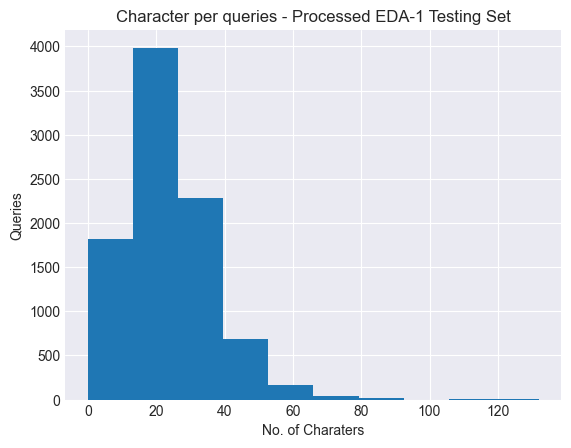

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  19


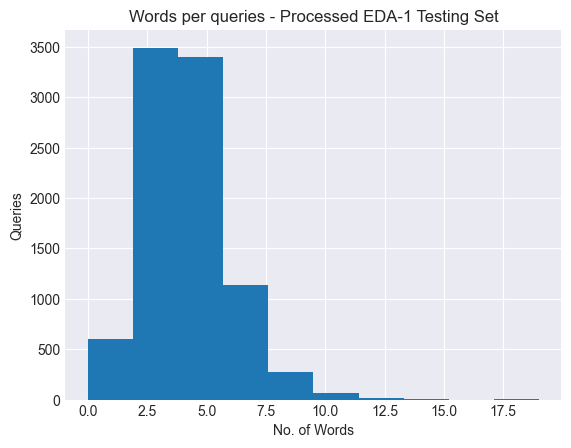

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  13.0


c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


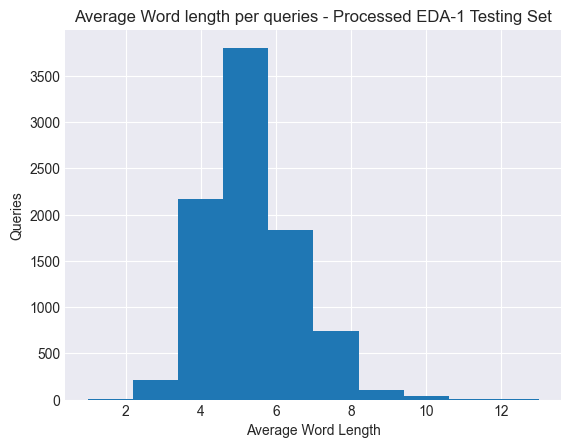


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  3982


In [17]:
# creating processed testing dataframe
processed_test_df = pd.DataFrame(({"Query": x_test,
                                   "Intent": eda_size_1_test.iloc[:, 1]}))
# exploring the processed testing data
processed_test_explore = preprocess.eda(data=processed_test_df,
                                        path=os.path.join(augment_plot_path, r"EDA\Preprocessed\Testing"))
# plotting number of character per record
processed_test_explore.char_per_query(title="Processed EDA-1 Testing Set")
# plotting number of words per record
processed_test_explore.word_per_query(title="Processed EDA-1 Testing Set")
# plotting average word length per record
processed_test_explore.avg_word_len_per_query(title="Processed EDA-1 Testing Set")
# line graph of word frequency per class
processed_test_word_freq_dict = processed_test_explore.word_freq_per_class(
    title="Processed EDA-1 Testing Set")
# worldcloud of word frequency per class
processed_test_worldcloud_dict = processed_test_explore.word_cloud_per_class(
    title="Processed EDA-1 Testing Set")
# number of unique words
processed_test_num_unique_words = processed_test_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_test_num_unique_words)

### Creating a textvectorization layer using Keras

In [13]:
# setting vocabulary size
VOCAB_SIZE = 50000
# setting the oputput sequence length for textvector layer
SEQ_LEN = 25
# creating a keras text vector layer
textvector_layer = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                                     ngrams=(1, 2, 3),
                                                     output_mode="int",
                                                     output_sequence_length=SEQ_LEN)
# learning the vocabulary in the dataset from training data
textvector_layer.adapt(x_train)

#### Training the Single Layer LSTM Model with best Auto-Hyperparameter on EDA size-1

In [11]:
# single lstm path
single_lstm_model_callback = os.path.join(model_callback_path, r"EDA\Single_lstm")

##### For 30 Epochs

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.0000e+00 - f1_score: 0.0031 - loss: 5.0129 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0046 - val_loss: 4.7130 - val_precision: 0.0000e+00
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.0000e+00 - f1_score: 0.0167 - loss: 4.5516 - precision: 0.1060 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0254 - val_loss: 3.9438 - val_precision: 0.0526
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.0000e+00 - f1_score: 0.0478 - loss: 3.8261 - precision: 0.0893 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0420 - val_loss: 3.7254 - val_precision: 0.1818
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.0000e+00 - f1_score: 0.1032 - loss: 3.2293 - precision: 0.2407 - val_accuracy: 0.0000e+00 - val_f1_score: 0.1429 - val_loss: 2.8675 - val_precision: 0.4671
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.0000e+00 - f1_score: 0.2134 - l

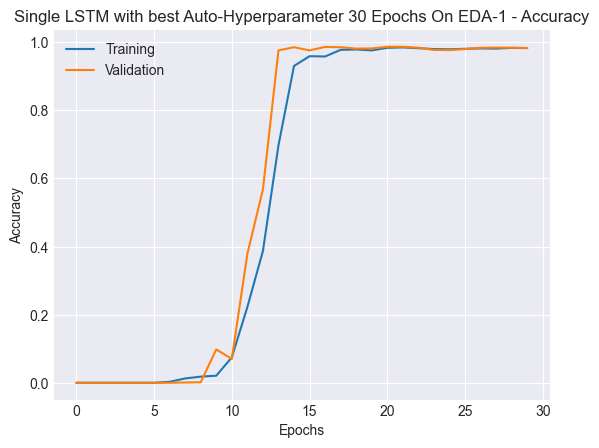

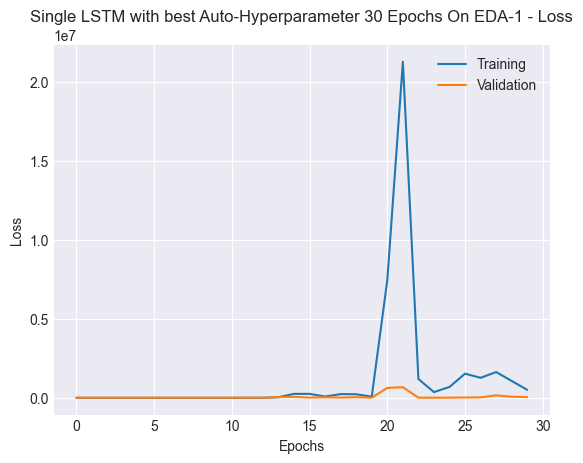

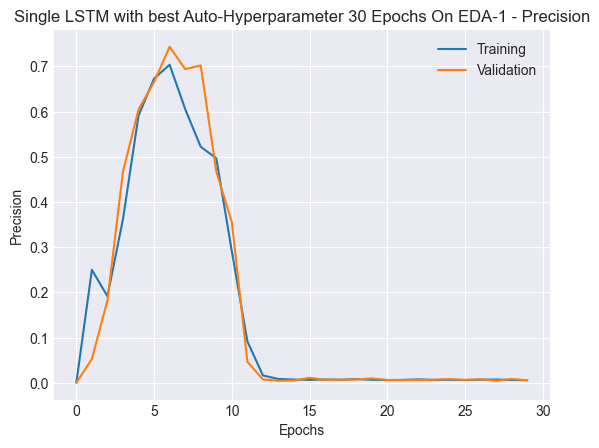

282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9835 - f1_score: 0.0027 - loss: 44962.4336 - precision: 0.0050


<Figure size 640x480 with 0 Axes>

In [23]:
# single lstm model with tuned hyperparamter
hp_lstm_model_30 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_model_callback,
                                              model=hp_lstm_model_30,
                                              batch_size=96,
                                              epochs=30,
                                              filename="hp_96Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_30,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs On EDA-1",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_30_evaluate = hp_lstm_model_30.evaluate(
    x=x_test, y=y_test, verbose=1)

##### For 50 Epochs

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 5.6979e-06 - f1_score: 0.0039 - loss: 5.0099 - precision: 0.0494 - val_accuracy: 0.0000e+00 - val_f1_score: 2.6545e-04 - val_loss: 5.2296 - val_precision: 0.0000e+00
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.0000e+00 - f1_score: 0.0180 - loss: 4.4676 - precision: 0.0369 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0259 - val_loss: 3.7663 - val_precision: 0.0000e+00
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.0000e+00 - f1_score: 0.0589 - loss: 3.6933 - precision: 0.2268 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0628 - val_loss: 3.4054 - val_precision: 0.2353
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.0000e+00 - f1_score: 0.1105 - loss: 3.1267 - precision: 0.4337 - val_accuracy: 0.0000e+00 - val_f1_score: 0.1330 - val_loss: 3.0014 - val_precision: 0.3326
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 9.0832e-05 - f1_score: 0.21

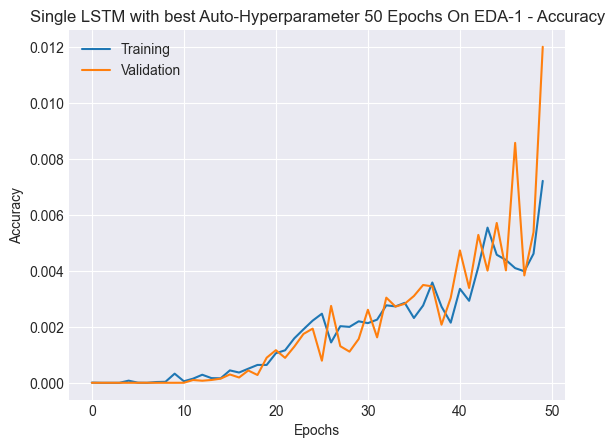

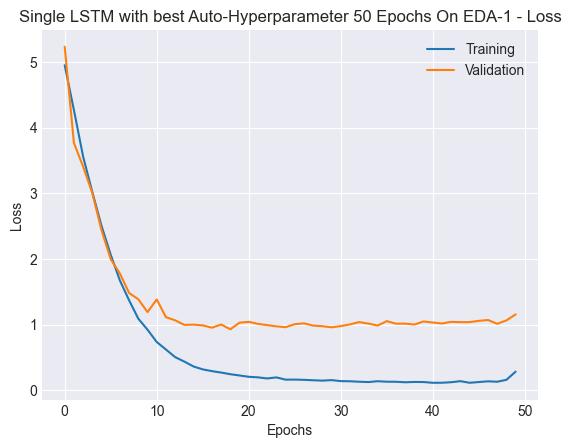

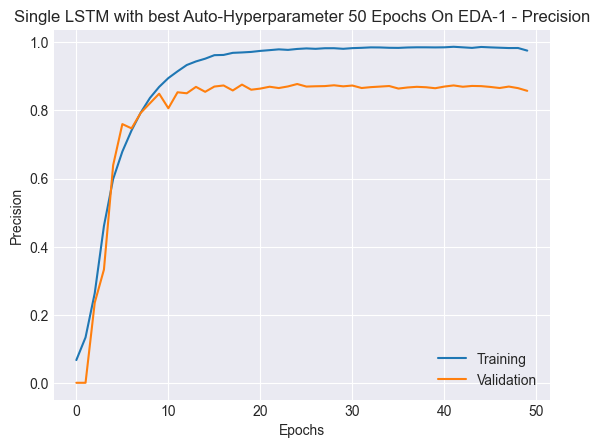

282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0099 - f1_score: 0.7945 - loss: 1.2107 - precision: 0.8509


<Figure size 640x480 with 0 Axes>

In [24]:
# single lstm model with tuned hyperparamter
hp_lstm_model_50 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_50 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_model_callback,
                                              model=hp_lstm_model_50,
                                              batch_size=96,
                                              epochs=50,
                                              filename="hp_96Batch_50epochs")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_50,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs On EDA-1",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_50_evaluate = hp_lstm_model_50.evaluate(
    x=x_test, y=y_test, verbose=1)


Epoch 1/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 1.9604e-04 - f1_score: 0.0026 - loss: 5.0690 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 4.7580e-04 - val_loss: 5.0474 - val_precision: 0.0000e+00
Epoch 2/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 4.6944e-05 - f1_score: 0.0072 - loss: 4.7518 - precision: 0.1025 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0031 - val_loss: 4.6899 - val_precision: 0.0000e+00
Epoch 3/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.0000e+00 - f1_score: 0.0223 - loss: 4.1712 - precision: 0.0082 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0188 - val_loss: 3.7730 - val_precision: 0.0909
Epoch 4/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 1.5663e-05 - f1_score: 0.0573 - loss: 3.6281 - precision: 0.2666 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0618 - val_loss: 3.4036 - val_precision: 0.2989
Epoch 5/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 2.8562e-06 - f1_score: 0.

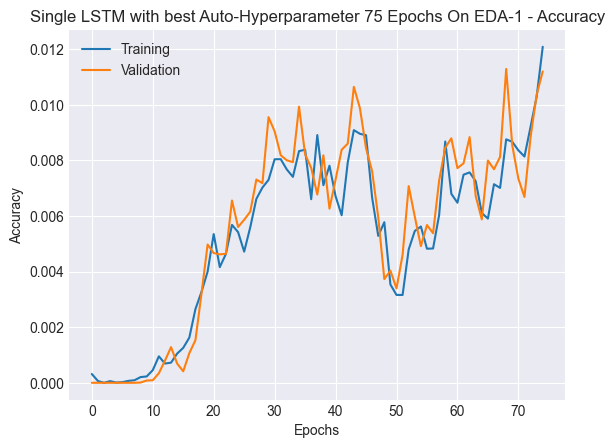

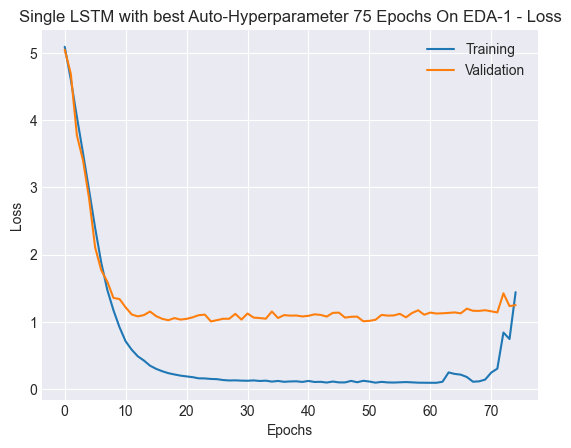

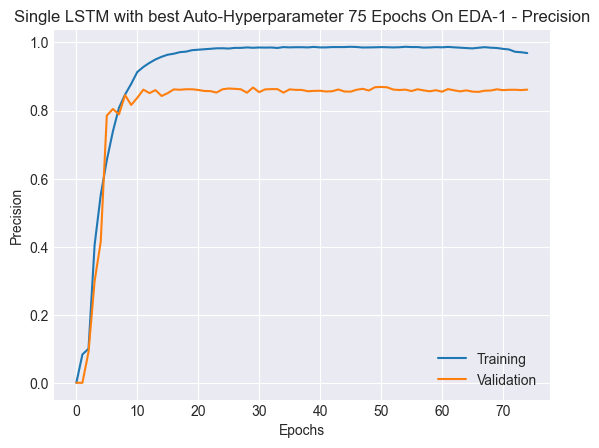

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0092 - f1_score: 0.8120 - loss: 1.2064 - precision: 0.8612


<Figure size 640x480 with 0 Axes>

In [14]:
# single lstm model with tuned hyperparamter
hp_lstm_model_75 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_75 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_model_callback,
                                              model=hp_lstm_model_75,
                                              batch_size=96,
                                              epochs=75,
                                              filename="hp_96Batch_75epochs")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_75,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs On EDA-1",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_75_evaluate = hp_lstm_model_75.evaluate(
    x=x_test, y=y_test, verbose=1)

### Training the Single Layer LSTM Model with Last best Sets of Auto-Hyperparameter on EDA size-1

##### For 30 Epochs

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 2.5873e-04 - f1_score: 0.0029 - loss: 5.0914 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0040 - val_loss: 4.9602 - val_precision: 0.0000e+00
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 1.6284e-04 - f1_score: 0.0112 - loss: 4.7686 - precision: 0.0773 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0395 - val_loss: 3.8770 - val_precision: 0.6170
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 1.8307e-04 - f1_score: 0.1168 - loss: 3.4438 - precision: 0.5353 - val_accuracy: 2.2222e-06 - val_f1_score: 0.4301 - val_loss: 2.3874 - val_precision: 0.8994
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.0015 - f1_score: 0.5510 - loss: 1.6941 - precision: 0.8728 - val_accuracy: 0.0052 - val_f1_score: 0.6975 - val_loss: 1.5047 - val_precision: 0.9174
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.0161 - f1_score: 0.8405 - loss: 0.6589 - precision:

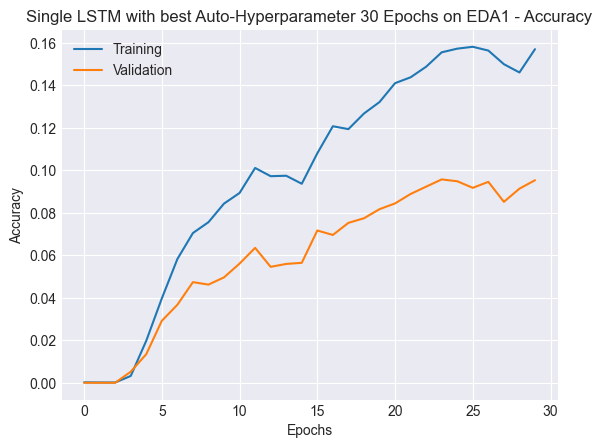

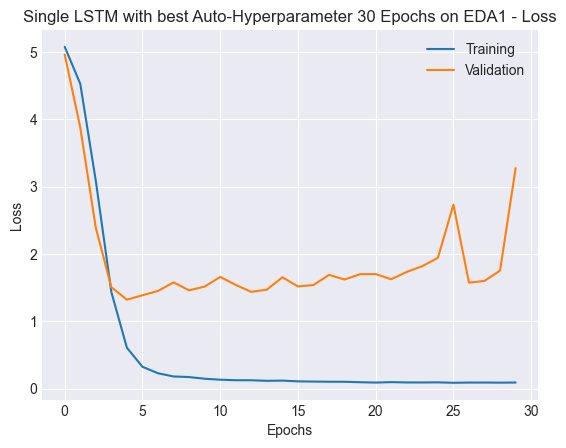

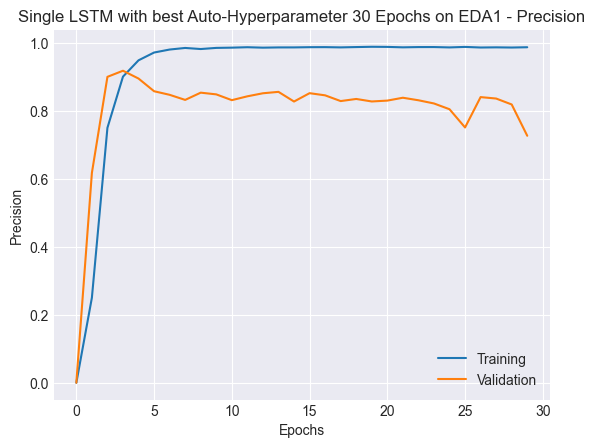

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0966 - f1_score: 0.7041 - loss: 3.4595 - precision: 0.7215


<Figure size 640x480 with 0 Axes>

In [17]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_30 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                                  x_val=x_val,
                                                  y_val=y_val,
                                                  path=single_lstm_model_callback,
                                                  model=old_hp_lstm_model_30,
                                                  batch_size=192,
                                                  epochs=30,
                                                  filename="old_hp_192Batch_30epochs_eda1")
# plottiing the mertics
train_lstm.plot(history=old_hp_lstm_history_30,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs on EDA1",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_30_evaluate = old_hp_lstm_model_30.evaluate(
    x=x_test, y=y_test, verbose=1)

##### For 50 Epochs

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.0000e+00 - f1_score: 0.0045 - loss: 4.9372 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0089 - val_loss: 4.1737 - val_precision: 0.0000e+00
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 3.1132e-05 - f1_score: 0.0441 - loss: 3.8787 - precision: 0.3598 - val_accuracy: 2.2222e-06 - val_f1_score: 0.2041 - val_loss: 2.8914 - val_precision: 0.7920
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 8.9770e-06 - f1_score: 0.3529 - loss: 2.3377 - precision: 0.8088 - val_accuracy: 3.4444e-05 - val_f1_score: 0.6842 - val_loss: 1.4932 - val_precision: 0.9129
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 7.2554e-04 - f1_score: 0.7957 - loss: 0.8162 - precision: 0.9412 - val_accuracy: 9.5111e-04 - val_f1_score: 0.7877 - val_loss: 1.0328 - val_precision: 0.9080
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.0027 - f1_score: 0.9161 - loss: 0.3623 - pr

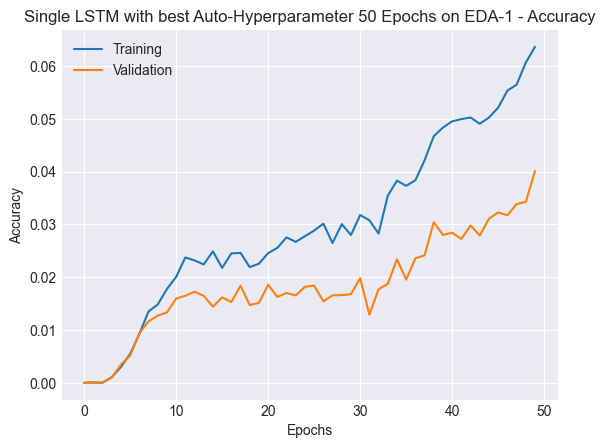

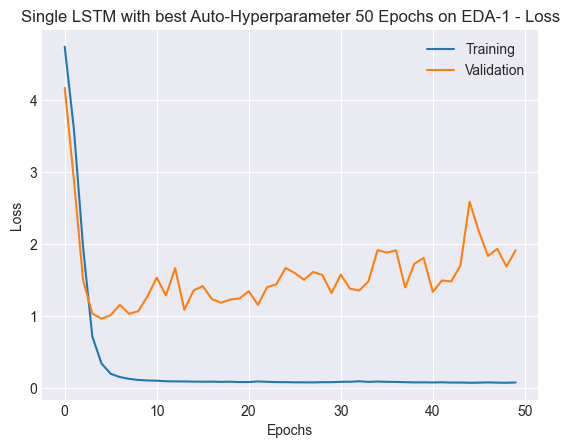

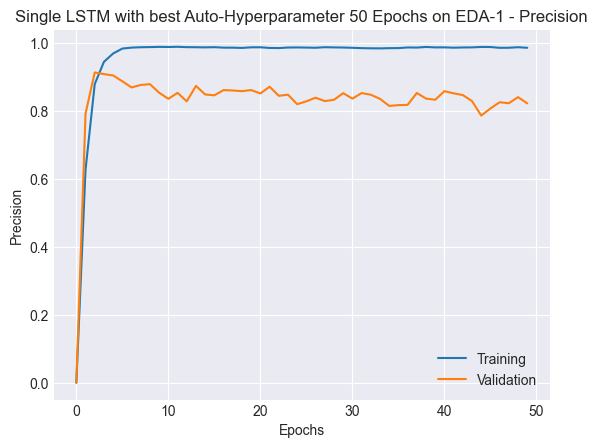

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0384 - f1_score: 0.7598 - loss: 1.8719 - precision: 0.8207


<Figure size 640x480 with 0 Axes>

In [18]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_50 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_50 = train_lstm.model_history(x=x_train, y=y_train,
                                                  x_val=x_val,
                                                  y_val=y_val,
                                                  path=single_lstm_model_callback,
                                                  model=old_hp_lstm_model_50,
                                                  batch_size=192,
                                                  epochs=50,
                                                  filename="old_hp_192Batch_50epochs_eda1")
# plottiing the mertics
train_lstm.plot(history=old_hp_lstm_history_50,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs on EDA-1",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_50_evaluate = old_hp_lstm_model_50.evaluate(
    x=x_test, y=y_test, verbose=1)

##### For 75 Epochs

Epoch 1/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 3.4353e-04 - f1_score: 0.0026 - loss: 5.1952 - precision: 0.0032 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0025 - val_loss: 4.8730 - val_precision: 0.0000e+00
Epoch 2/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 7.7500e-06 - f1_score: 0.0110 - loss: 4.6859 - precision: 0.1194 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0327 - val_loss: 4.2116 - val_precision: 0.2222
Epoch 3/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 5.3621e-05 - f1_score: 0.0546 - loss: 3.9358 - precision: 0.4821 - val_accuracy: 4.6667e-05 - val_f1_score: 0.1371 - val_loss: 3.3857 - val_precision: 0.9496
Epoch 4/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 9.0553e-04 - f1_score: 0.2006 - loss: 2.8858 - precision: 0.7442 - val_accuracy: 0.0019 - val_f1_score: 0.3501 - val_loss: 2.6440 - val_precision: 0.8541
Epoch 5/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.0056 - f1_score: 0.4768 - loss: 1.8118 - precision:

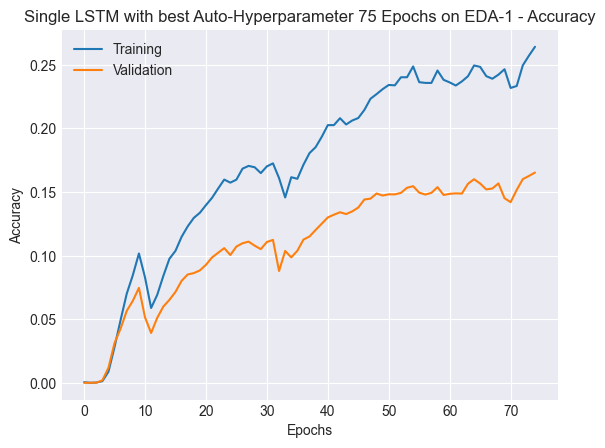

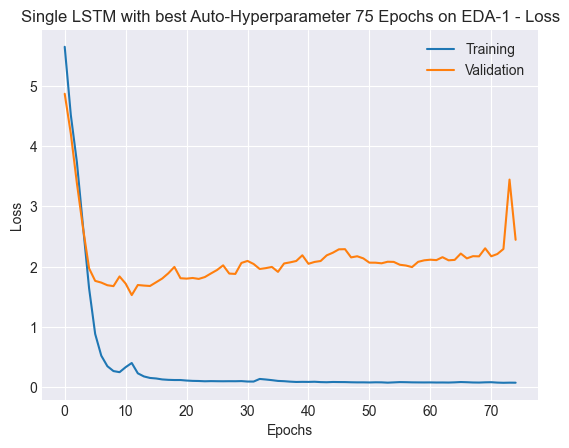

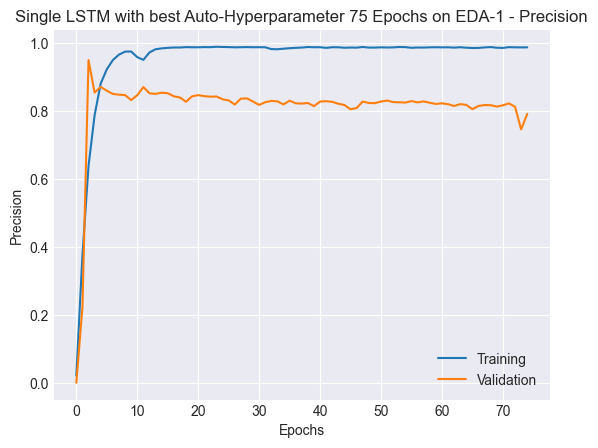

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1598 - f1_score: 0.7316 - loss: 2.3726 - precision: 0.7976


<Figure size 640x480 with 0 Axes>

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_75 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_75 = train_lstm.model_history(x=x_train, y=y_train,
                                                  x_val=x_val,
                                                  y_val=y_val,
                                                  path=single_lstm_model_callback,
                                                  model=old_hp_lstm_model_75,
                                                  batch_size=192,
                                                  epochs=75,
                                                  filename="old_hp_192Batch_75epochs_eda1")

train_lstm.plot(history=old_hp_lstm_history_75,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs on EDA-1",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_75_evaluate = old_hp_lstm_model_75.evaluate(
    x=x_test, y=y_test, verbose=1)